In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Netflix_moviedb.csv', lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
pd.options.display.max_columns = None

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format = "%Y-%m-%d")
print(df['Release_Date'].dtypes)

datetime64[ns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [7]:
df['Release_Date'] = df['Release_Date'].dt.year
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
# Dropping the unnecessary columns- Overview, Original_Language, Poster_Url
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis = 1, inplace=True)

In [9]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [10]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [11]:
df['Release_Date'].value_counts()

Release_Date
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: count, Length: 102, dtype: int64

Categorizing `Vote_Average` column into four categories `Blockbuster`, `Superhit`, `Average`, and `Flop` using `Categorize_col` function.

In [12]:
def Categorize_col (df, col, labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    
    df[col]=pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [13]:
labels = ['Flop', 'Average', 'Superhit', 'Blockbuster']

Categorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Blockbuster,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Blockbuster,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Superhit,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Blockbuster,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Flop,Horror
9824,2016,The Offering,13.355,94,Flop,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Superhit,"Music, Drama, History"


In [14]:
df['Vote_Average'].value_counts()

Vote_Average
Flop           2467
Blockbuster    2450
Superhit       2412
Average        2398
Name: count, dtype: int64

In [15]:
df.isnull().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Blockbuster,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Blockbuster,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Superhit,"Action, Adventure, Thriller, War"


In [18]:
# Split the genre column into list
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,Science Fiction
3,2022,The Batman,3827.658,1151,Blockbuster,Crime
4,2022,The Batman,3827.658,1151,Blockbuster,Mystery


In [19]:
df['Genre'] = df['Genre'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [20]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

### Q1. what is the most frequent genre of movies released on netflix?

In [21]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [22]:
df['Genre'].value_counts()

Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1426
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

In [23]:
genre_percentage = (df['Genre'].value_counts(normalize=True) * 100).reset_index()
genre_percentage.columns = ['Genre', 'Percentage']
print(genre_percentage)

              Genre  Percentage
0             Drama   14.538979
1            Comedy   11.764245
2            Action   10.378835
3          Thriller    9.678303
4         Adventure    7.157952
5           Romance    5.717752
6            Horror    5.702098
7         Animation    5.580776
8            Family    5.498591
9           Fantasy    5.068096
10  Science Fiction    4.911553
11            Crime    4.833281
12          Mystery    2.993895
13          History    1.667188
14              War    1.201472
15            Music    1.138854
16         TV Movie    0.837508
17      Documentary    0.794458
18          Western    0.536162


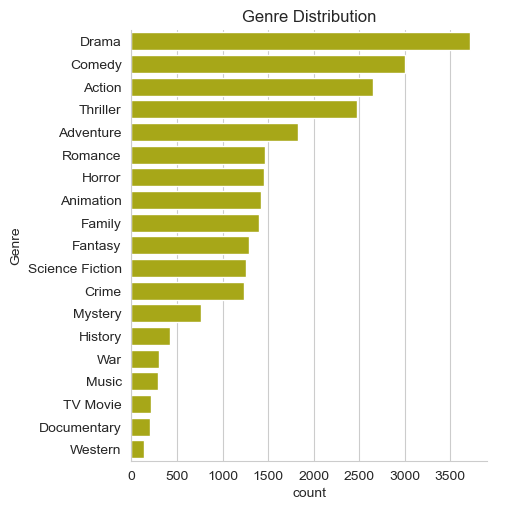

In [24]:
sns.set_style("whitegrid")
sns.catplot(y='Genre', data=df, kind='count',
           order=df['Genre'].value_counts().index,
           color='y')
plt.title("Genre Distribution")
plt.show()

### Q2. which genre has highest votes?

In [25]:
genre_votes = df.groupby('Genre', observed=False)['Vote_Count'].sum().reset_index()
genre_votes

,Genre,Vote_Count
0,Action,4868675
1,Adventure,4313869
2,Animation,1525045
3,Comedy,3933497
4,Crime,1980261
5,Documentary,38224
6,Drama,5141495
7,Family,2046625
8,Fantasy,2521940
9,History,527056


In [26]:
genre_percentage = (df.groupby('Genre', observed=False)['Vote_Count'].sum() / df['Vote_Count'].sum()) * 100

print(genre_percentage)

Genre
Action             12.543625
Adventure          11.114226
Animation           3.929117
Comedy             10.134238
Crime               5.101933
Documentary         0.098480
Drama              13.246517
Family              5.272912
Fantasy             6.497511
History             1.357904
Horror              3.731871
Music               0.766338
Mystery             3.043430
Romance             4.647186
Science Fiction     7.343949
TV Movie            0.176331
Thriller            9.356417
War                 1.156590
Western             0.481425
Name: Vote_Count, dtype: float64


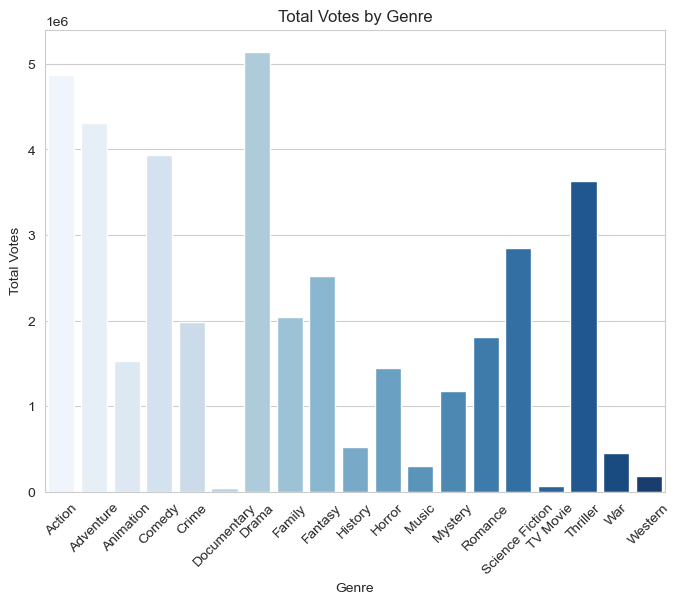

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Genre', y='Vote_Count', data=genre_votes, hue='Genre', legend=False, palette='Blues')

plt.title('Total Votes by Genre')
plt.xlabel('Genre', )
plt.xticks(rotation=45)
plt.ylabel('Total Votes')

plt.show()


### Q3. Which movie get highest popularity and what is its Genre?

In [28]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Blockbuster,Science Fiction


### Q4. Which movie get Lowest popularity and what is its Genre?

In [29]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Superhit,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Superhit,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Superhit,History
25549,1984,Threads,13.354,186,Blockbuster,War
25550,1984,Threads,13.354,186,Blockbuster,Drama
25551,1984,Threads,13.354,186,Blockbuster,Science Fiction


### Q5. In which year most movies are Released?

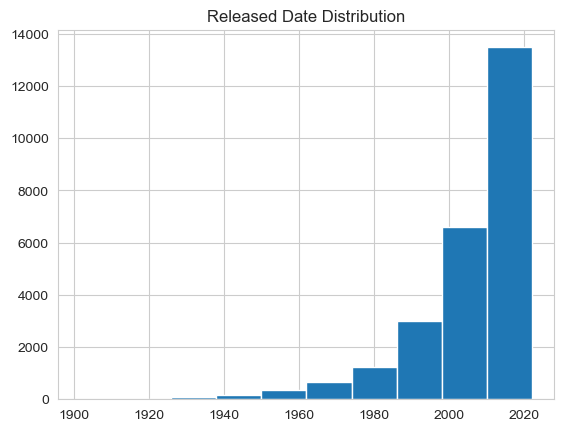

In [30]:
df['Release_Date'].hist()
plt.title("Released Date Distribution")
plt.show()

Summary:

Q1. what is the most frequent genre of movies released on netflix?  
A:  `Drama` is the most frequent genere and has appeared more than 14% of all other 19 genre.

Q2. which category has highest vote in vote average column?  
A:  `Drama` genre has highest vote.(13% vote among all other genre.)  

Q3. Which movie get highest popularity and what is its Genre?  
A:  `Spider-Man: No Way Home` is most popular movies and genres are `Action`, `Adventure` and `Science friction`.  

Q4. Which movie get lowest popularity and what is its Genre?  
A:  Two movies has lowect popularity  
    i. `The United States vs. Billie Holiday` and genres are `music`, `Drama`, `History`  
    ii. `Threads` and genres are `war`, `Drama`, `Science friction`.
    
Q5. In which year most movies are Released?  
A:  In year 2020 most movies are released.